In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

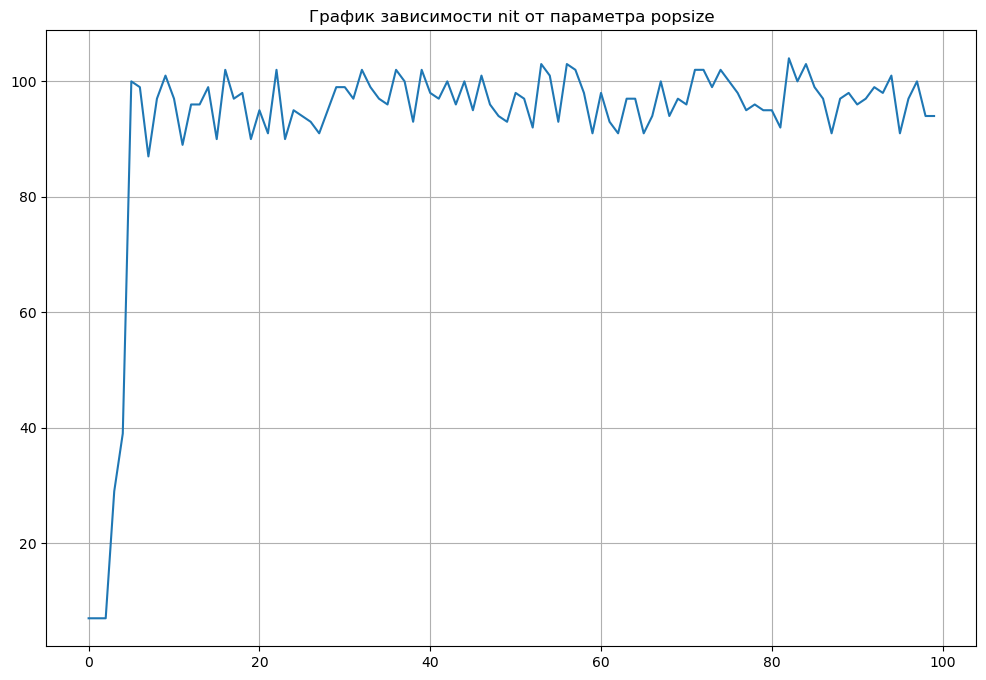

In [46]:
x = [i for i in range(0, 100, 1)]
y = []
for c in x:
    y.append(differential_evolution(ackley, bounds, seed=42, popsize=c)['nit'])
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.title('График зависимости nit от параметра popsize')
plt.grid(True)
plt.show()

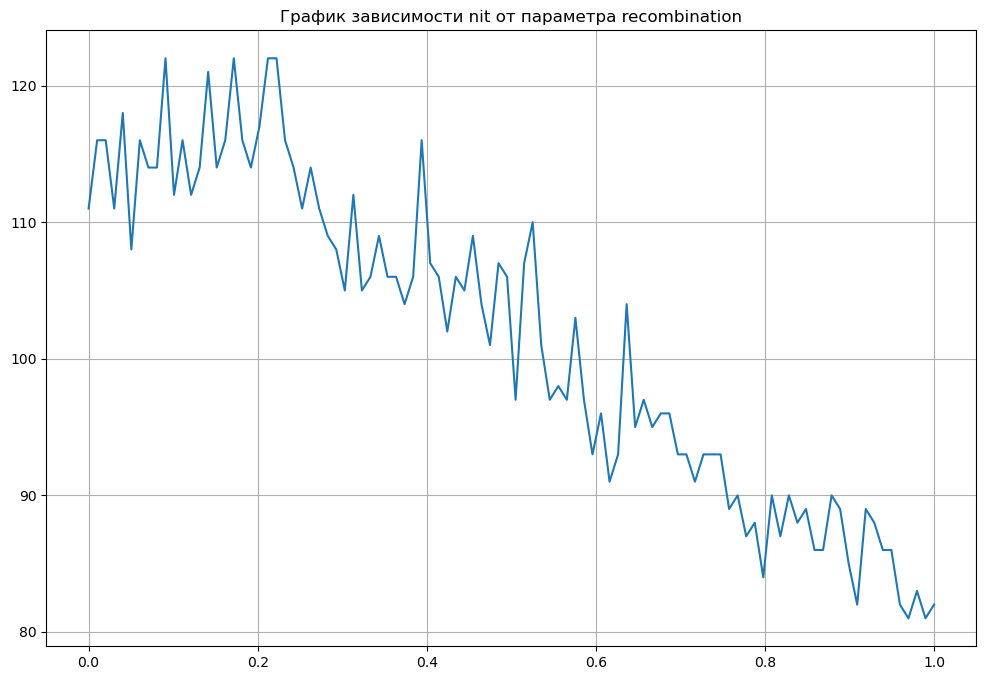

In [51]:
x = np.linspace(0, 1, 100)
y = []
for c in x:
    y.append(differential_evolution(ackley, bounds, seed=42, recombination=c)['nit'])
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.title('График зависимости nit от параметра recombination')
plt.grid(True)
plt.show()

In [113]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0, method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.440892098500626e-16
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 4.441e-16,  5.136e-05,  8.816e-05]))

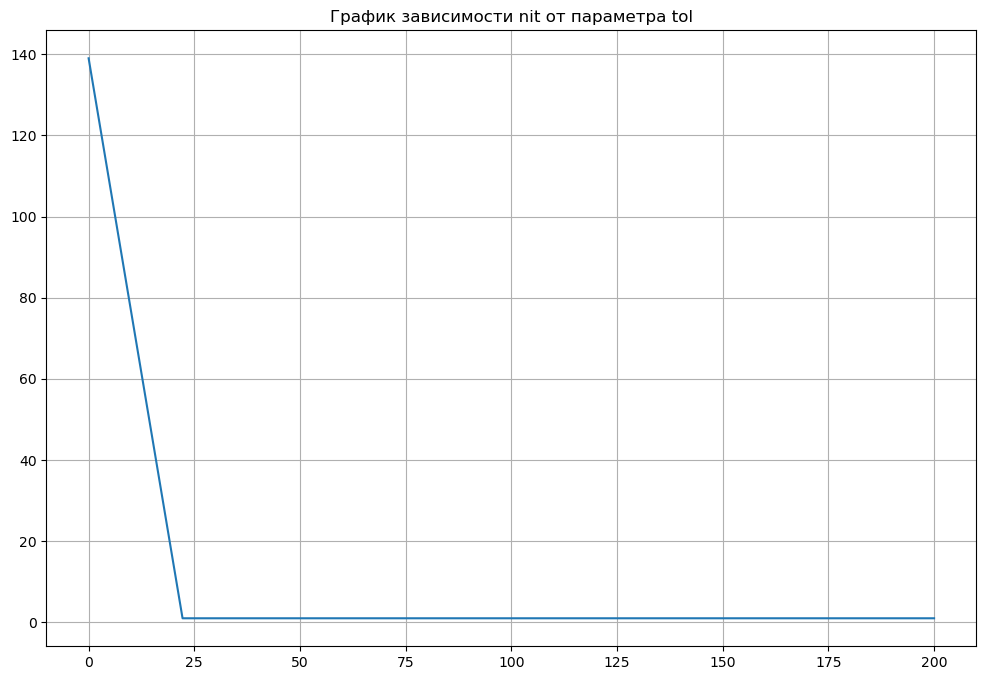

In [61]:
x = np.linspace(0, 200, 10)
y = []
for c in x:
    y.append(minimize(ackley, x0,  method='Nelder-Mead', tol=c)['nit'])
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.title('График зависимости nit от параметра tol')
plt.grid(True)
plt.show()

Text(0.5, 0.92, 'График зависимости nit от параметра x0')

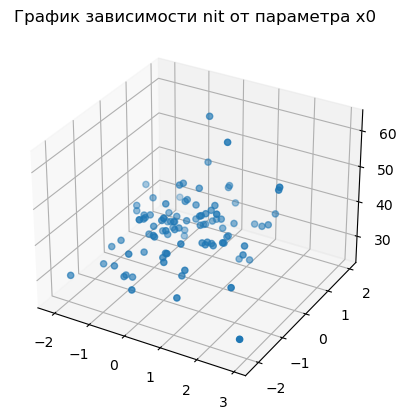

In [148]:
from mpl_toolkits.mplot3d import Axes3D
x0 = np.random.randn(100,2)
x1 = []
x2 = []
y = []
for c in x0:
    y.append(minimize(ackley, c,  method='Nelder-Mead')['nit'])
    x1.append(c[0])
    x2.append(c[1])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y)
plt.title('График зависимости nit от параметра x0')